# Quandl: United Stated Unemployment Claims

In this notebook, we'll take a look at data set , available on [Quantopian](https://www.quantopian.com/data). This dataset spans from 1967 through the current day. It contains the value for the United States unemployment claims provided by the US Federal Reserve via the [FRED data initiative](https://research.stlouisfed.org/fred2/). We access this data via the API provided by [Quandl](https://www.quandl.com). [More details](https://www.quandl.com/data/FRED/CCSA-Continued-Claims-Insured-Unemployment) on this dataset can be found on Quandl's website.

### Blaze
Before we dig into the data, we want to tell you about how  you generally access Quantopian partner data sets. These datasets are available using the [Blaze](http://blaze.pydata.org) library. Blaze provides the Quantopian user with a convenient interface to access very large datasets.

Some of these sets (though not this one) are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

To learn more about using Blaze and generally accessing Quantopian partner data, clone [this tutorial notebook](https://www.quantopian.com/clone_notebook?id=561827d21777f45c97000054).

With preamble in place, let's get started:

In [2]:
# import the dataset
from quantopian.interactive.data.quandl import fred_ccsa
# Since this data is public domain and provided by Quandl for free, there is no _free version of this
# data set, as found in the premium sets. This import gets you the entirety of this data set.

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
fred_ccsa.sort('asof_date')

,asof_date,value,timestamp
0,1967-01-07,1134000,1967-01-07
1,1967-01-14,1119000,1967-01-14
2,1967-01-21,1119000,1967-01-21
3,1967-01-28,1103000,1967-01-28
4,1967-02-04,1131000,1967-02-04
5,1967-02-11,1153000,1967-02-11
6,1967-02-18,1167000,1967-02-18
7,1967-02-25,1199000,1967-02-25
8,1967-03-04,1235000,1967-03-04
9,1967-03-11,1234000,1967-03-11


The data goes all the way back to 1967 and is updated weekly.

Blaze provides us with the first 10 rows of the data for display. Just to confirm, let's just count the number of rows in the Blaze expression:

In [4]:
fred_ccsa.count()

2550

Let's go plot it for fun. This data set is definitely small enough to just put right into a Pandas DataFrame

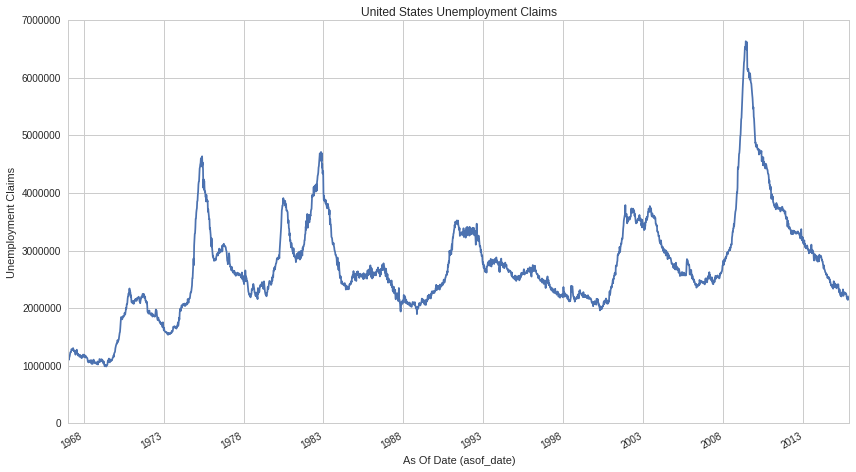

In [5]:
unrate_df = odo(fred_ccsa, pd.DataFrame)

unrate_df.plot(x='asof_date', y='value')
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Unemployment Claims")
plt.title("United States Unemployment Claims")
plt.legend().set_visible(False)

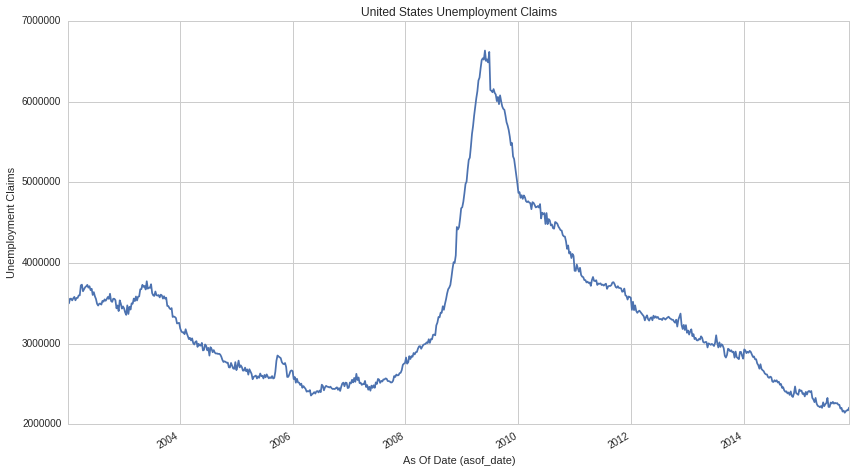

In [7]:
unrate_recent = odo(fred_ccsa[fred_ccsa.asof_date >= '2002-01-01'], pd.DataFrame)

unrate_recent.plot(x='asof_date', y='value')
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Unemployment Claims")
plt.title("United States Unemployment Claims")
plt.legend().set_visible(False)